<a href="https://colab.research.google.com/github/Manish-k723/Placement_prediction/blob/main/Placement_100_days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Placement Prediction**

In this project we will be working on a ML model which will predict whether a student get placed in his/her campus placement based on some of the very basic or simple features which includes `cgpa` and `iq`.

`CGPA` represents how the student is handling his academics. Higher the CGPA, higher the chances of placement.

`IQ` represents the intelligence score of a candidate which meant to measure person's congnitive abilities in comparision to rest of the population. IQ tests typically assess a range of mental abilities, including reasoning, problem-solving, spatial perception, memory, and verbal comprehension.

**NOTE**- We all may think both of the columns are strongly correlated but studies shows that both the columns are related to some extent but not strongly correlated.

# Importing necessary Libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
# Following are the Steps which we will use in this model training

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

# **EDA**

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='iq', ylabel='cgpa'>

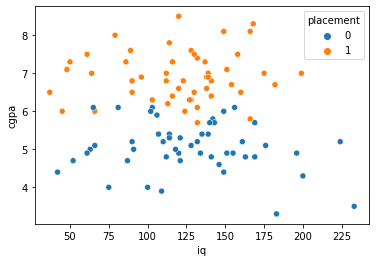

In [26]:
sns.scatterplot(data = df, x = 'iq', y = 'cgpa', hue = df.placement)

It's an unexceptional graph. Lot of randomness. Earlier, I used to talk about the relation between cgpa and iq which i said is not strongly correlated but this plot is telling a completely different story. From the plot, we can say the correlation is somewhere less than `0.1`. 


<AxesSubplot:>

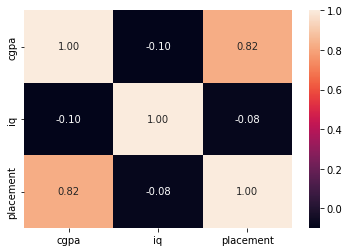

In [20]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

`IQ` doesnot have good relations with other two columns, the correlation coeffiecient too low but from the heatmap we can conclude that cgpa is important and very useful in placement prediction.

In [25]:
df.cgpa.max(), df.cgpa.min()

(8.5, 3.3)

Oh thank-god! My cgpa is more than this. It means if would be in this college then I would have been easily placed :-)

<AxesSubplot:xlabel='placement', ylabel='count'>

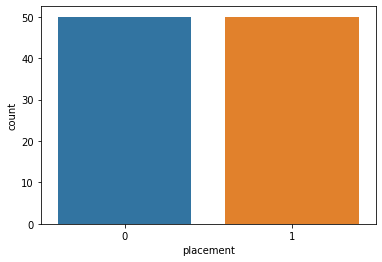

In [28]:
sns.countplot(data = df, x=df.placement)

# **Splitting Input and Outputs**

In [29]:
x = df.iloc[:,:2]
y = df.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

#Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

In [44]:
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
preds = model.predict(X_test)

In [53]:
print(preds)
y_test

[1 1 0 1 1 1 1 1 1 0]


61    1
55    1
4     0
57    1
63    1
71    1
60    1
3     1
42    1
89    0
Name: placement, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, preds)

1.0

In [58]:
!pip install mlxtend --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.8 MB/s eta 0:00:00


In [59]:
from mlxtend.plotting import plot_decision_regions

In [65]:
# plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

In [66]:
import pickle

In [67]:
pickle.dump(model, open('model_p.pkl', 'wb'))